In [22]:
import keras
from keras import models
from keras import layers
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np
from keras.datasets import cifar10
from keras.utils import to_categorical

### Datos

In [23]:
(X, y), (test_images, test_labels) = cifar10.load_data()
print(X.shape, y.shape,test_images.shape,test_labels.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


### Procesamiento de datos

In [24]:
train_images = X.astype('float32')[0:40000] / 255
val_images = X.astype('float32')[40000: 50000] / 255
test_images = test_images.astype('float32')[0:10000] / 255

In [25]:
train_labels = to_categorical(y[0:40000])
val_labels = to_categorical(y[40000:50000])
test_labels = to_categorical(test_labels[0:10000])

In [26]:
print(train_labels.shape, val_labels.shape,test_labels.shape)

(40000, 10) (10000, 10) (10000, 10)


### Red convolucional

In [27]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)             

In [28]:
optimizer = SGD(lr=.01,momentum=0.1, nesterov=True)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
history = model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=10, batch_size=8)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 44s 1ms/step - loss: 1.8013 - accuracy: 0.3497 - val_loss: 1.5086 - val_accuracy: 0.4583
Epoch 2/10
40000/40000 [==============================] - 35s 874us/step - loss: 1.3698 - accuracy: 0.5113 - val_loss: 1.2548 - val_accuracy: 0.5583
Epoch 3/10
40000/40000 [==============================] - 38s 939us/step - loss: 1.1750 - accuracy: 0.5874 - val_loss: 1.2276 - val_accuracy: 0.5671
Epoch 4/10
40000/40000 [==============================] - 35s 874us/step - loss: 1.0590 - accuracy: 0.6313 - val_loss: 1.1203 - val_accuracy: 0.6173
Epoch 5/10
40000/40000 [==============================] - 32s 807us/step - loss: 0.9791 - accuracy: 0.6607 - val_loss: 1.0075 - val_accuracy: 0.6482
Epoch 6/10
40000/40000 [==============================] - 36s 888us/step - loss: 0.9104 - accuracy: 0.6842 - val_loss: 1.0020 - val_accuracy: 0.6569
Epoch 7/10
40000/40000 [==============================] - 

### Graficas de perdida y presición de entrenamiento

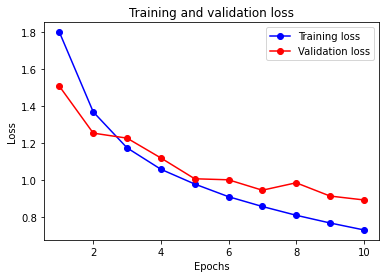

In [30]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo-', label='Training loss')
plt.plot(epochs, val_loss_values, 'ro-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

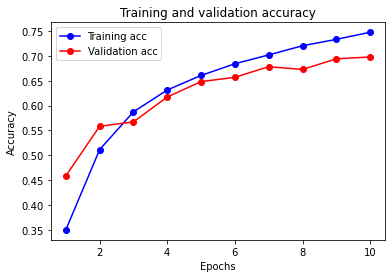

In [31]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo-', label='Training acc')
plt.plot(epochs, val_acc_values, 'ro-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Resultados

In [32]:
pred = model.predict(test_images)
print(classification_report(np.argmax(test_labels, axis=1), np.argmax(pred, axis=1)))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73      1000
           1       0.84      0.81      0.82      1000
           2       0.65      0.49      0.56      1000
           3       0.52      0.52      0.52      1000
           4       0.58      0.73      0.65      1000
           5       0.67      0.57      0.61      1000
           6       0.68      0.85      0.76      1000
           7       0.76      0.73      0.75      1000
           8       0.83      0.81      0.82      1000
           9       0.74      0.80      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

